# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [14]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

from agents.agent import DDPG

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = DDPG(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

state = agent.reset_episode()
# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act(state)
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

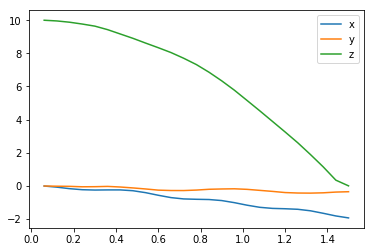

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

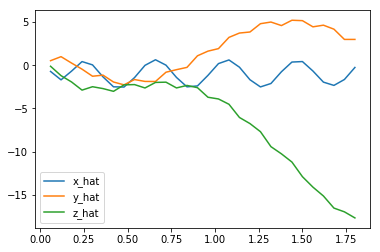

In [3]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

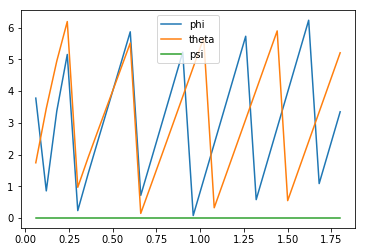

In [4]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

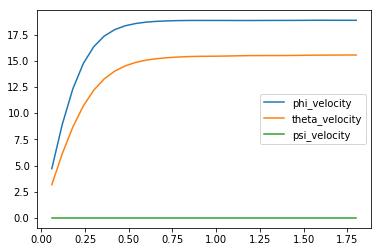

In [5]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

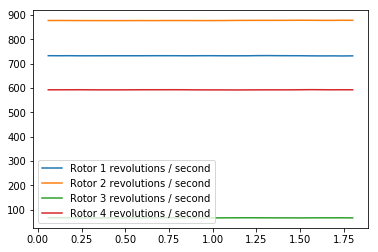

In [6]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [7]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-1.79628949  2.71400179  0.          3.34670109  5.20754996  0.        ]
[ -0.26396988   2.97714931 -17.65698272]
[18.86376767 15.54875346  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [35]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 500
target_pos = np.array([0., 0., 500.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode =  500, score =  -1.345 (best =  -1.339), noise_scale = 3.2625

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [31]:
import sys
import pandas as pd
from agents.agent import DDPG
from task import Task
    
init_pose = np.array([0., 0., 10., 0., 0., 0.])
num_episodes = 1000
target_pos = np.array([0., 0., 0.])
task = Task(init_pose = init_pose, target_pos=target_pos)
agent = DDPG(task) 

best_score = 0
average_score = 0

reward_labels = ['episode', 'score', 'average_score']
reward_results = {x : [] for x in reward_labels}

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    score = 0
    
    # Initialize visualization class    
#     animplot = AnimatedPlot()

    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        score += reward
        agent.step(action, reward, next_state, done)
        state = next_state
        
        # Visualize Quadcopter
#         animplot.plot(task)
        if done: 
            reward_results['episode'].append(i_episode)
            reward_results['score'].append(score)
            reward_results['average_score'].append(average_score)
            if score > best_score:
                best_score = score
            average_score = (average_score * (i_episode - 1) + score) / i_episode
            print('position', state)
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}, average_score = {:7.3f})".format(
                i_episode, score, best_score, average_score), end="")  # [debug]
            break
    sys.stdout.flush()

position [-0.89737222  0.49464472  0.          1.6030044   1.71948374  0.
 -0.91553617  0.49613296  0.          1.59837081  1.42955719  0.
 -0.93966455  0.4976555   0.          1.5867675   1.12849475  0.        ]
Episode =    1, score =  47.434 (best =  47.434, average_score =  47.434)position [-0.75756597  0.47480025  0.57536861  1.73945328  2.56878922  0.
 -0.76071708  0.4838008   0.27477953  1.64080192  2.26032349  0.
 -0.76802281  0.48839125  0.          1.53773351  1.93973932  0.        ]
Episode =    2, score =  45.163 (best =  47.434, average_score =  46.298)position [-0.68866393  0.46093992  0.56323319  1.65697846  2.56772023  0.
 -0.69038848  0.46905126  0.2626685   1.55203997  2.25994431  0.
 -0.69629476  0.4725443   0.          1.44280235  1.93975455  0.        ]
Episode =    3, score =  45.166 (best =  47.434, average_score =  45.921)position [-2.93661121  0.18226421  0.10202128  2.7131213   2.42681566  0.
 -3.05477488  0.20072599  0.          3.43024317  2.66955875  0.
 -3

Episode =   29, score =  60.907 (best = 121.406, average_score =  63.432)position [-0.20515176  1.71479223  0.57866217  5.15325536  6.09867383  0.
 -0.11252733  1.74847651  0.25053527  5.22532034  0.47499519  0.
 -0.02102635  1.77455123  0.          5.23673179  1.03063029  0.        ]
Episode =   30, score =  65.285 (best = 121.406, average_score =  63.494)position [-0.86380315 -0.0782202   0.5207795   2.16074236  2.68106538  0.
 -0.94881619 -0.09207318  0.23585662  5.60431833  2.77178521  0.
 -1.03541531 -0.10700435  0.          2.13227759  2.86054452  0.        ]
Episode =   31, score =  60.840 (best = 121.406, average_score =  63.409)position [-8.89696952e-02 -2.03517787e+00  5.40295505e-01  4.10272062e+00
  5.54698094e+00  0.00000000e+00 -4.07453825e-03 -2.02200735e+00
  2.16788753e-01  4.04695643e+00  5.64636726e+00  0.00000000e+00
  8.57347231e-02 -2.01274756e+00  0.00000000e+00  3.99102102e+00
  5.74336223e+00  0.00000000e+00]
Episode =   32, score =  67.526 (best = 121.406, ave

Episode =   54, score = 174.996 (best = 176.492, average_score =  95.972)position [-4.57900669e-03  3.38522903e+01  7.10106373e+01  1.59397195e+00
  2.78387226e-04  0.00000000e+00 -4.64720173e-03  3.42553060e+01
  7.11119225e+01  1.60315555e+00  2.80267289e-04  0.00000000e+00
 -4.71592898e-03  3.46602340e+01  7.12095154e+01  1.61229808e+00
  2.82160557e-04  0.00000000e+00]
Episode =   55, score = 174.213 (best = 176.492, average_score =  97.395)position [-2.37867122e-03  3.27768423e+01  7.14458887e+01  1.48208227e+00
  8.94919568e-05  0.00000000e+00 -2.40832676e-03  3.31758850e+01
  7.15450040e+01  1.48887578e+00  9.00552108e-05  0.00000000e+00
 -2.43813184e-03  3.35765793e+01  7.16404314e+01  1.49552925e+00
  9.06184648e-05  0.00000000e+00]
Episode =   56, score = 174.479 (best = 176.492, average_score =  98.771)position [-5.51917610e-04  2.79982383e+01  7.61740313e+01  4.16104100e-01
  6.28315081e+00  0.00000000e+00 -5.50530541e-04  2.82741926e+01
  7.64375643e+01  4.14472994e-01  6.

Episode =   76, score = 176.645 (best = 176.920, average_score = 118.926)position [-4.83597571e-03  6.13132325e+00  8.20681813e+01  6.82162822e-02
  1.68495810e-04  0.00000000e+00 -4.90390620e-03  6.15749000e+00
  8.24133162e+01  7.31001181e-02  1.68910075e-04  0.00000000e+00
 -4.97248972e-03  6.18392995e+00  8.27583883e+01  7.80853561e-02
  1.69324340e-04  0.00000000e+00]
Episode =   77, score = 176.115 (best = 176.920, average_score = 119.668)position [ 1.48974419e-03 -9.52492317e+00  8.11270517e+01  5.83168976e+00
  6.28314111e+00  0.00000000e+00  1.51000777e-03 -9.68121169e+00
  8.14425487e+01  5.82828610e+00  6.28314110e+00  0.00000000e+00
  1.53043363e-03 -9.83910775e+00  8.17574223e+01  5.82493046e+00
  6.28314111e+00  0.00000000e+00]
Episode =   78, score = 176.312 (best = 176.920, average_score = 120.395)position [-3.24070161e-03  1.51836757e+01  7.96587598e+01  7.96216037e-01
  6.96162477e-05  0.00000000e+00 -3.28394167e-03  1.54196836e+01
  7.99341545e+01  8.02823016e-01  6.

Episode =  103, score =  65.357 (best = 176.920, average_score = 110.595)position [-1.84670753 -0.00840887  0.04004117  0.12749009  3.65453354  0.
 -1.84361787 -0.01030135  0.          0.09054471  5.28734296  0.
 -1.83209018 -0.01248179  0.          0.05390449  0.23334087  0.        ]
Episode =  104, score =  65.355 (best = 176.920, average_score = 110.160)position [-1.49300047  0.35709138  0.278332    2.31193628  0.22981745  0.
 -1.46018751  0.38111266  0.          1.84338763  0.82172908  0.
 -1.43371945  0.41411319  0.          1.35304198  1.32732942  0.        ]
Episode =  105, score =  63.084 (best = 176.920, average_score = 109.712)position [-1.3240862   0.52425289  0.43853529  0.80194978  0.8345331   0.
 -1.29820961  0.58215464  0.18246928  0.2648668   1.34808708  0.
 -1.2841112   0.64291881  0.          6.00921491  1.7930527   0.        ]
Episode =  106, score =  65.349 (best = 176.920, average_score = 109.293)position [-1.80664374  0.08836606  0.          0.43617142  5.31803275

Episode =  128, score = 175.335 (best = 176.920, average_score = 107.128)position [-54.95919789  -5.46852216  36.14291802   0.55244964   3.41482434
   0.         -55.29732736  -5.50584155  35.89765028   0.5607095
   3.99122487   0.         -55.62545225  -5.5483897   35.64044101
   0.56898234   4.56762779   0.        ]
Episode =  129, score = 172.453 (best = 176.920, average_score = 107.634)position [-2.46094296e-04  2.40421876e+01  7.66292710e+01  7.69875283e-01
  6.33981271e-05  0.00000000e+00 -2.51995166e-04  2.43409468e+01
  7.68570861e+01  7.72914319e-01  6.44942862e-05  0.00000000e+00
 -2.58086139e-04  2.46417289e+01  7.70831567e+01  7.75911955e-01
  6.55930530e-05  0.00000000e+00]
Episode =  130, score = 174.919 (best = 176.920, average_score = 108.151)position [-5.37154465e-03  2.34538050e+01  7.67194228e+01  6.45131004e-01
  1.83232299e-04  0.00000000e+00 -5.44811063e-03  2.37677679e+01
  7.69395951e+01  6.41101011e-01  1.83363937e-04  0.00000000e+00
 -5.52527042e-03  2.4083417

Episode =  151, score = 173.985 (best = 176.920, average_score = 116.747)position [-1.20625844e-03  1.68035107e+01  7.93740456e+01  4.97512442e-01
  6.28311996e+00  0.00000000e+00 -1.20718500e-03  1.70312842e+01
  7.96565906e+01  4.98031762e-01  6.28311923e+00  0.00000000e+00
 -1.20788187e-03  1.72606425e+01  7.99383288e+01  4.98571693e-01
  6.28311851e+00  0.00000000e+00]
Episode =  152, score = 175.604 (best = 176.920, average_score = 117.134)position [ 2.01141527e-03 -2.45703193e+00  8.19667966e+01  5.98047706e+00
  6.28308715e+00  0.00000000e+00  2.04714711e-03 -2.56023656e+00
  8.22995499e+01  5.97910698e+00  6.28308676e+00  0.00000000e+00
  2.08325167e-03 -2.66457336e+00  8.26319956e+01  5.97767922e+00
  6.28308637e+00  0.00000000e+00]
Episode =  153, score = 176.654 (best = 176.920, average_score = 117.523)position [-27.6764351   34.31406154  63.55588108   1.73634188   0.61823142
   0.         -27.92649617  34.67104003  63.55663899   1.74396375
   0.62060599   0.         -28.176

Episode =  174, score = 174.780 (best = 176.928, average_score = 122.828)position [-1.38843536 -0.01645185  0.49847148  6.21601045  3.45535913  0.
 -1.4101923  -0.01639407  0.18451108  6.21560685  4.03190181  0.
 -1.4246535  -0.01577516  0.          6.21531135  4.60844534  0.        ]
Episode =  175, score =  56.304 (best = 176.928, average_score = 122.448)position [-3.74490150e+00  1.64193801e+00  8.22871700e+01  5.79983597e-01
  7.98876664e-02  0.00000000e+00 -3.78793162e+00  1.73812353e+00
  8.26299443e+01  5.85069811e-01  8.02156757e-02  0.00000000e+00
 -3.83128903e+00  1.83629456e+00  8.29722882e+01  5.90214132e-01
  8.05436495e-02  0.00000000e+00]
Episode =  176, score = 176.413 (best = 176.928, average_score = 122.754)position [-65.06087013   6.81731162  15.4183132    5.93796008   1.78467463
   0.         -65.43167668   6.84609975  15.04732164   5.93403825
   2.3614526    0.         -65.80540426   6.87531139  14.6705797
   5.93010612   2.93817859   0.        ]
Episode =  177, sc

Episode =  197, score = 173.481 (best = 176.928, average_score = 126.705)position [1.67099786e-03 5.17523340e+00 8.20543523e+01 6.11842970e+00
 6.28313794e+00 0.00000000e+00 1.69302522e-03 5.18607355e+00
 8.24015865e+01 6.11572432e+00 6.28313777e+00 0.00000000e+00
 1.71524499e-03 5.19614031e+00 8.27488781e+01 6.11300480e+00
 6.28313760e+00 0.00000000e+00]
Episode =  198, score = 176.216 (best = 176.928, average_score = 126.955)position [ 1.68102040e-03 -1.15745987e+00  8.28206639e+01  8.00222158e-01
  6.28291736e+00  0.00000000e+00  1.74068643e-03 -1.05244565e+00
  8.31782988e+01  8.09401447e-01  6.28291463e+00  0.00000000e+00
  1.80159493e-03 -9.44640428e-01  8.35357632e+01  8.18605082e-01
  6.28291190e+00  0.00000000e+00]
Episode =  199, score = 176.286 (best = 176.928, average_score = 127.203)position [-1.01513709  0.10107273  0.          5.28130376  2.02793147  0.
 -1.00710801  0.10329607  0.          4.7263606   4.72897856  0.
 -0.99839018  0.10699336  0.          4.16431785  0.45

Episode =  221, score = 173.806 (best = 182.691, average_score = 130.244)position [-2.06270067e-03 -3.61988030e+01  6.82069370e+01  4.83228650e+00
  9.14338139e-05  0.00000000e+00 -2.08675473e-03 -3.66086104e+01
  6.82651854e+01  4.82758480e+00  9.30471285e-05  0.00000000e+00
 -2.11093374e-03 -3.70197635e+01  6.83196666e+01  4.82299688e+00
  9.47061598e-05  0.00000000e+00]
Episode =  222, score = 174.162 (best = 182.691, average_score = 130.442)position [-5.60051327e-04 -1.14291172e+01  8.08243571e+01  5.96181601e+00
  4.93430452e-05  0.00000000e+00 -5.69689858e-04 -1.15957720e+01
  8.11378824e+01  5.96113465e+00  5.04029629e-05  0.00000000e+00
 -5.79514603e-04 -1.17636818e+01  8.14510012e+01  5.96034355e+00
  5.14424813e-05  0.00000000e+00]
Episode =  223, score = 176.108 (best = 182.691, average_score = 130.647)position [5.99532241e-04 3.85652594e+01 6.84808337e+01 1.08984274e+00
 1.26188950e-06 0.00000000e+00 6.04969225e-04 3.89596348e+01
 6.85881177e+01 1.09533137e+00 2.10299243e-0

Episode =  244, score = 176.460 (best = 182.691, average_score = 133.650)position [ 5.33317996e-03 -1.87382084e+01  7.92098069e+01  5.98427761e+00
  6.28295131e+00  0.00000000e+00  5.41486803e-03 -1.89546121e+01
  7.95060520e+01  5.98728361e+00  6.28295001e+00  0.00000000e+00
  5.49746046e-03 -1.91724557e+01  7.98019627e+01  5.99032309e+00
  6.28294871e+00  0.00000000e+00]
Episode =  245, score = 175.239 (best = 182.691, average_score = 133.820)position [3.82189172e-03 1.91535541e+01 7.89260937e+01 4.73786451e-01
 6.28293918e+00 0.00000000e+00 3.88605614e-03 1.93853154e+01
 7.92067797e+01 4.71264680e-01 6.28293701e+00 0.00000000e+00
 3.95110046e-03 1.96185727e+01 7.94867745e+01 4.68716790e-01
 6.28293485e+00 0.00000000e+00]
Episode =  246, score = 175.157 (best = 182.691, average_score = 133.988)position [2.00753738e-03 3.18159322e+01 7.24332237e+01 9.98689873e-01
 1.27919810e-04 0.00000000e+00 2.00576303e-03 3.21820689e+01
 7.25836739e+01 1.00338047e+00 1.29246674e-04 0.00000000e+00
 

Episode =  266, score = 175.210 (best = 182.691, average_score = 137.099)position [ 2.41885377e-03 -6.74261936e+00  8.09089376e+01  5.18727414e+00
  6.28304488e+00  0.00000000e+00  2.46096721e-03 -6.99402724e+00
  8.11818190e+01  5.17708936e+00  6.28304374e+00  0.00000000e+00
  2.50361969e-03 -7.24901498e+00  8.14521704e+01  5.16687840e+00
  6.28304259e+00  0.00000000e+00]
Episode =  267, score = 176.475 (best = 182.691, average_score = 137.246)position [-1.72362664e-03 -2.96172888e+01  7.42171099e+01  5.55635054e+00
  3.17544697e-05  0.00000000e+00 -1.74525352e-03 -2.99547873e+01
  7.44158972e+01  5.55367287e+00  3.14929022e-05  0.00000000e+00
 -1.76697303e-03 -3.02944754e+01  7.46127323e+01  5.55093285e+00
  3.12423684e-05  0.00000000e+00]
Episode =  268, score = 174.403 (best = 182.691, average_score = 137.385)position [-9.90194666e-04 -7.77857810e-01  8.21102896e+01  6.02509361e+00
  6.28316475e+00  0.00000000e+00 -9.92749824e-04 -8.27492053e-01
  8.24530234e+01  6.02218727e+00  6.

Episode =  289, score = 175.885 (best = 182.691, average_score = 138.872)position [-9.88684359e-02  3.32889286e+01  7.12156008e+01  1.10717935e+00
  3.53197875e-03  0.00000000e+00 -1.00102401e-01  3.36707499e+01
  7.13381427e+01  1.10961253e+00  3.54878897e-03  0.00000000e+00
 -1.01343689e-01  3.40543851e+01  7.14577573e+01  1.11202021e+00
  3.56560137e-03  0.00000000e+00]
Episode =  290, score = 174.230 (best = 182.691, average_score = 138.994)position [-1.56421792e-03 -1.48373877e+01  8.01046063e+01  5.82750325e+00
  6.50445008e-05  0.00000000e+00 -1.58874635e-03 -1.50292807e+01
  8.04056857e+01  5.82572754e+00  6.54537172e-05  0.00000000e+00
 -1.61350832e-03 -1.52227833e+01  8.07060382e+01  5.82400872e+00
  6.58629327e-05  0.00000000e+00]
Episode =  291, score = 175.661 (best = 182.691, average_score = 139.120)position [ 4.00706626e-03 -5.54759459e+00  8.16728764e+01  5.86108729e+00
  6.28300951e+00  0.00000000e+00  4.06713135e-03 -5.67982171e+00
  8.19975186e+01  5.86026623e+00  6.

Episode =  311, score = 176.034 (best = 182.691, average_score = 141.466)position [-3.24077380e-03  1.53570464e+01  7.96808381e+01  8.69934909e-01
  1.28821556e-04  0.00000000e+00 -3.28818036e-03  1.56052845e+01
  7.99508105e+01  8.74874297e-01  1.29526925e-04  0.00000000e+00
 -3.33600768e-03  1.58559851e+01  8.02189917e+01  8.79874824e-01
  1.30232295e-04  0.00000000e+00]
Episode =  312, score = 175.851 (best = 182.691, average_score = 141.576)position [6.41495710e-03 3.65457556e+01 6.89887161e+01 1.74122362e+00
 6.28286073e+00 0.00000000e+00 6.50508355e-03 3.69679805e+01
 6.90569168e+01 1.75326192e+00 6.28285874e+00 0.00000000e+00
 6.59578279e-03 3.73920165e+01 6.91213271e+01 1.76522865e+00
 6.28285675e+00 0.00000000e+00]
Episode =  313, score = 174.090 (best = 182.691, average_score = 141.680)position [-3.14296638e-03 -1.17940979e+00  8.21433667e+01  5.88332178e+00
  1.07705166e-04  0.00000000e+00 -3.17909590e-03 -1.24411524e+00
  8.24855072e+01  5.87808033e+00  1.08450978e-04  0.00

Episode =  334, score = 175.437 (best = 182.691, average_score = 143.267)position [5.88176910e-04 1.21374773e+01 8.07207532e+01 1.08596949e+00
 6.28315491e+00 0.00000000e+00 6.00327121e-04 1.23599231e+01
 8.10189015e+01 1.10189311e+00 6.28315489e+00 0.00000000e+00
 6.12606818e-04 1.25858783e+01 8.13156105e+01 1.11787852e+00
 6.28315487e+00 0.00000000e+00]
Episode =  335, score = 176.064 (best = 182.691, average_score = 143.364)position [-1.44082558e-03 -1.48230900e+01  7.87448686e+01  5.03936953e+00
  1.02127111e-04  0.00000000e+00 -1.47011015e-03 -1.51390756e+01
  7.89610623e+01  5.03157441e+00  1.02890430e-04  0.00000000e+00
 -1.49971259e-03 -1.54580800e+01  7.91740825e+01  5.02389821e+00
  1.03657345e-04  0.00000000e+00]
Episode =  336, score = 176.227 (best = 182.691, average_score = 143.462)position [-1.88354003e-03  4.12026724e+01  6.58708964e+01  1.03407885e+00
  8.36568923e-05  0.00000000e+00 -1.90622577e-03  4.16210363e+01
  6.59424527e+01  1.03510353e+00  8.43351149e-05  0.00

Episode =  356, score = 176.593 (best = 182.691, average_score = 144.914)position [-1.04021614e-02  3.04770810e+01  7.41379067e+01  6.19801855e-01
  4.29785319e-04  0.00000000e+00 -1.05506208e-02  3.08051963e+01
  7.43508993e+01  6.19087627e-01  4.32263558e-04  0.00000000e+00
 -1.07004869e-02  3.11348290e+01  7.45628945e+01  6.18454294e-01
  4.34741796e-04  0.00000000e+00]
Episode =  357, score = 174.200 (best = 182.691, average_score = 144.996)position [-8.64927589e-04 -3.45159193e+01  7.09636350e+01  5.17148359e+00
  6.28310965e+00  0.00000000e+00 -8.64648420e-04 -3.48918084e+01
  7.10974260e+01  5.16240431e+00  6.28310842e+00  0.00000000e+00
 -8.64213355e-04 -3.52695540e+01  7.12281501e+01  5.15323101e+00
  6.28310718e+00  0.00000000e+00]
Episode =  358, score = 174.034 (best = 182.691, average_score = 145.077)position [1.29792410e-03 3.68981467e+00 8.22768971e+01 5.93377159e+00
 6.28314374e+00 0.00000000e+00 1.32276915e-03 3.65214578e+00
 8.26255476e+01 5.93142862e+00 6.28314404e+0

Episode =  379, score = 175.825 (best = 182.691, average_score = 146.764)position [ 7.11797559e-03 -2.92410146e+01  7.49315897e+01  5.82604127e+00
  6.28261524e+00  0.00000000e+00  7.24416591e-03 -2.95715395e+01
  7.51590812e+01  5.82964712e+00  6.28260786e+00  0.00000000e+00
  7.37250385e-03 -2.99044940e+01  7.53856270e+01  5.83335738e+00
  6.28260046e+00  0.00000000e+00]
Episode =  380, score = 174.362 (best = 182.691, average_score = 146.837)position [-4.51498016e-04  3.92970182e+01  6.67204258e+01  1.28461156e+00
  9.58137602e-05  0.00000000e+00 -4.62915265e-04  3.97130886e+01
  6.67677090e+01  1.28550467e+00  9.69075419e-05  0.00000000e+00
 -4.74468382e-04  4.01304788e+01  6.68115774e+01  1.28637881e+00
  9.80028848e-05  0.00000000e+00]
Episode =  381, score = 173.846 (best = 182.691, average_score = 146.908)position [-2.39718379e-03  7.10031435e-01  8.23694585e+01  5.23754907e-01
  6.28314226e+00  0.00000000e+00 -2.41556046e-03  7.92187515e-01
  8.27162233e+01  5.27712594e-01  6.

Episode =  401, score = 174.173 (best = 182.691, average_score = 148.307)position [-1.06195250e-03  1.80140700e+01  7.90050023e+01  1.24161527e+00
  1.38634963e-04  0.00000000e+00 -1.09498760e-03  1.83178257e+01
  7.92464622e+01  1.25116239e+00  1.39237785e-04  0.00000000e+00
 -1.12847024e-03  1.86245093e+01  7.94853971e+01  1.26076497e+00
  1.39839109e-04  0.00000000e+00]
Episode =  402, score = 175.735 (best = 182.691, average_score = 148.375)position [ 5.75727027e-03 -2.20305131e+01  7.93517879e+01  6.12442164e+00
  6.28299132e+00  0.00000000e+00  5.82857285e-03 -2.22362549e+01
  7.96660961e+01  6.12610136e+00  6.28298954e+00  0.00000000e+00
  5.90065169e-03 -2.24431488e+01  7.99803304e+01  6.12780041e+00
  6.28298777e+00  0.00000000e+00]
Episode =  403, score = 174.546 (best = 182.691, average_score = 148.440)position [1.03612227e-03 3.94900446e+01 6.66187873e+01 1.49103711e+00
 6.28316036e+00 0.00000000e+00 1.04598159e-03 3.99084902e+01
 6.66580278e+01 1.49562915e+00 6.28316020e+0

Episode =  423, score = 175.056 (best = 182.691, average_score = 149.714)position [3.14926620e-03 4.85747531e+01 5.84643129e+01 1.49815571e+00
 6.28290561e+00 0.00000000e+00 3.19410001e-03 4.90111007e+01
 5.84215045e+01 1.50289120e+00 6.28290381e+00 0.00000000e+00
 3.23910435e-03 4.94480466e+01 5.83749357e+01 1.50776853e+00
 6.28290202e+00 0.00000000e+00]
Episode =  424, score = 173.065 (best = 182.691, average_score = 149.769)position [ 1.29932288e-02 -1.49148246e+01  8.07533953e+01  6.22323522e+00
  6.28270171e+00  0.00000000e+00  1.31803444e-02 -1.50578358e+01
  8.10850228e+01  6.22619807e+00  6.28269902e+00  0.00000000e+00
  1.33694461e-02 -1.52014287e+01  8.14167947e+01  6.22918311e+00
  6.28269632e+00  0.00000000e+00]
Episode =  425, score = 175.353 (best = 182.691, average_score = 149.829)position [ 8.79495402e-03 -1.42607174e+01  8.06379474e+01  5.91077348e+00
  6.28304849e+00  0.00000000e+00  8.88743076e-03 -1.44158563e+01
  8.09555042e+01  5.90608562e+00  6.28304807e+00  0.00

Episode =  446, score = 171.610 (best = 182.691, average_score = 150.339)position [63.4116927  -3.35697593 37.2506569   0.41477234  4.22530351  0.
 63.83016724 -3.37619826 37.02690781  0.41988999  4.21835936  0.
 64.24773006 -3.39533228 36.79973101  0.42506421  4.21142596  0.        ]
Episode =  447, score = 172.123 (best = 182.691, average_score = 150.387)position [2.66022981e-03 1.66434686e+01 7.94843203e+01 1.33903461e+00
 6.28308137e+00 0.00000000e+00 2.69834104e-03 1.69451052e+01
 7.97390882e+01 1.35109457e+00 6.28308092e+00 0.00000000e+00
 2.73683881e-03 1.72501941e+01 7.99914801e+01 1.36320199e+00
 6.28308048e+00 0.00000000e+00]
Episode =  448, score = 175.870 (best = 182.691, average_score = 150.444)position [1.61255020e-03 2.75317916e+01 7.48973152e+01 9.63736308e-01
 6.28310780e+00 0.00000000e+00 1.63438449e-03 2.78680098e+01
 7.50839778e+01 9.68468172e-01 6.28310728e+00 0.00000000e+00
 1.65641838e-03 2.82063217e+01 7.52682020e+01 9.73434859e-01
 6.28310678e+00 0.00000000e+00

Episode =  470, score = 170.524 (best = 182.691, average_score = 151.134)position [ 2.4851852   4.4999171  83.23803761  0.53744459  6.22058223  0.
  2.51570995  4.60620933 83.57310228  0.54345538  6.22031196  0.
  2.54648125  4.71440832 83.90770966  0.54958901  6.2200417   0.        ]
Episode =  471, score = 176.045 (best = 182.691, average_score = 151.187)position [ 4.79034689e-03 -4.77616265e+01  5.91629050e+01  4.91384673e+00
  6.28284619e+00  0.00000000e+00  4.85678131e-03 -4.82009703e+01
  5.91339449e+01  4.90925802e+00  6.28284426e+00  0.00000000e+00
  4.92351833e-03 -4.86412459e+01  5.91009435e+01  4.90471137e+00
  6.28284233e+00  0.00000000e+00]
Episode =  472, score = 173.229 (best = 182.691, average_score = 151.233)position [-6.22930312e-03  3.64459472e+01  6.90643567e+01  1.55992036e+00
  1.89466071e-04  0.00000000e+00 -6.30110974e-03  3.68572738e+01
  6.91359641e+01  1.56792987e+00  1.88812789e-04  0.00000000e+00
 -6.37318787e-03  3.72700352e+01  6.92037640e+01  1.57602185e

Episode =  493, score = 175.697 (best = 182.691, average_score = 152.072)position [-5.13550912e-04 -1.03289932e+01  8.08585584e+01  5.64527258e+00
  2.47058156e-05  0.00000000e+00 -5.21250710e-04 -1.05118175e+01
  8.11629778e+01  5.64077641e+00  2.48960785e-05  0.00000000e+00
 -5.29040145e-04 -1.06968231e+01  8.14663551e+01  5.63625454e+00
  2.50863415e-05  0.00000000e+00]
Episode =  494, score = 176.278 (best = 182.691, average_score = 152.121)position [8.65961890e-03 1.83595868e+01 7.96316272e+01 3.59984149e-01
 6.28295177e+00 0.00000000e+00 8.76338546e-03 1.85543999e+01
 7.99359414e+01 3.60474429e-01 6.28295048e+00 0.00000000e+00
 8.86800017e-03 1.87503709e+01 8.02397655e+01 3.60822114e-01
 6.28294919e+00 0.00000000e+00]
Episode =  495, score = 175.211 (best = 182.691, average_score = 152.168)position [ 1.95390341e-03 -1.68357770e+01  7.92698775e+01  5.49101115e+00
  6.28305057e+00  0.00000000e+00  1.99125010e-03 -1.70798089e+01
  7.95391913e+01  5.48294023e+00  6.28304960e+00  0.00

Episode =  516, score = 174.105 (best = 182.691, average_score = 153.118)position [ 0.90044253 17.11052146 81.31161551  1.37466522  6.26315498  0.
  0.91098669 17.42614756 81.57029369  1.3839045   6.26307045  0.
  0.92159938 17.74497655 81.82653113  1.39311618  6.2629859   0.        ]
Episode =  517, score = 175.264 (best = 182.691, average_score = 153.160)position [-3.42212786e+00  1.79112599e+01  8.13186385e+01  9.20923937e-02
  7.58613132e-02  0.00000000e+00 -3.46120686e+00  1.80755133e+01
  8.16404732e+01  8.80664887e-02  7.61724095e-02  0.00000000e+00
 -3.50060674e+00  1.82397342e+01  8.19625630e+01  8.40360326e-02
  7.64834731e-02  0.00000000e+00]
Episode =  518, score = 174.238 (best = 182.691, average_score = 153.201)position [1.57679254e-02 3.99008825e+01 6.65017849e+01 1.73591644e+00
 6.28251662e+00 0.00000000e+00 1.59688316e-02 4.03289411e+01
 6.65398739e+01 1.74546882e+00 6.28251376e+00 0.00000000e+00
 1.61706012e-02 4.07583159e+01 6.65740892e+01 1.75493800e+00
 6.28251096e

Episode =  539, score = 176.429 (best = 182.691, average_score = 153.921)position [-3.13626144 26.2662055  76.58601268  1.25134019  0.0781382   0.
 -3.17145036 26.60772087 76.76640194  1.26136414  0.07846825  0.
 -3.20684289 26.95166605 76.94376043  1.27131899  0.07879828  0.        ]
Episode =  540, score = 174.010 (best = 182.691, average_score = 153.959)position [4.23973646e-04 2.07120928e+01 7.77492980e+01 9.68083301e-01
 6.28308076e+00 0.00000000e+00 4.45458552e-04 2.10036740e+01
 7.79816099e+01 9.76277852e-01 6.28308029e+00 0.00000000e+00
 4.67253925e-04 2.12976933e+01 7.82116817e+01 9.84495965e-01
 6.28307983e+00 0.00000000e+00]
Episode =  541, score = 175.357 (best = 182.691, average_score = 153.998)position [1.81672740e-03 4.30453109e-01 8.21130107e+01 9.16700336e-02
 6.28310677e+00 0.00000000e+00 1.84501685e-03 4.41737350e-01
 8.24576702e+01 9.23674347e-02 6.28310634e+00 0.00000000e+00
 1.87361710e-03 4.53374878e-01 8.28023364e+01 9.30458541e-02
 6.28310592e+00 0.00000000e+00

Episode =  562, score = 174.552 (best = 182.691, average_score = 154.590)position [3.09111370e-02 2.05101140e+01 7.86308061e+01 2.23938622e-01
 6.28215544e+00 0.00000000e+00 3.13329402e-02 2.07331537e+01
 7.89280891e+01 2.20600343e-01 6.28214994e+00 0.00000000e+00
 3.17589857e-02 2.09565914e+01 7.92255700e+01 2.17426256e-01
 6.28214443e+00 0.00000000e+00]
Episode =  563, score = 175.151 (best = 182.691, average_score = 154.627)position [34.43894407  3.16408236 72.40542443  0.53964301  5.49848405  0.
 34.78716033  3.23941933 72.58327143  0.54634749  5.49549251  0.
 35.13703321  3.31579802 72.75895328  0.55317046  5.49250296  0.        ]
Episode =  564, score = 173.493 (best = 182.691, average_score = 154.660)position [ 1.28426414e-02 -3.31576494e+01  7.17166792e+01  5.00314453e+00
  6.28239301e+00  0.00000000e+00  1.30475876e-02 -3.35338694e+01
  7.18445794e+01  4.99743271e+00  6.28238921e+00  0.00000000e+00
  1.32541462e-02 -3.39120381e+01  7.19691268e+01  4.99185931e+00
  6.28238543e+

Episode =  586, score = 173.816 (best = 182.691, average_score = 155.110)position [-6.92736236e-04 -3.99879859e+01  6.62073014e+01  4.90581430e+00
  3.23912879e-05  0.00000000e+00 -7.03952777e-04 -4.04003511e+01
  6.62587033e+01  4.89688452e+00  3.25295568e-05  0.00000000e+00
 -7.15212421e-04 -4.08140236e+01  6.63064145e+01  4.88785090e+00
  3.26693935e-05  0.00000000e+00]
Episode =  587, score = 173.706 (best = 182.691, average_score = 155.142)position [ 1.23933232e-03 -4.73114360e+00  8.20114690e+01  1.57288043e-01
  6.28308424e+00  0.00000000e+00  1.26763079e-03 -4.76834027e+00
  8.23590091e+01  1.62435254e-01  6.28308346e+00  0.00000000e+00
  1.29635290e-03 -4.80506062e+00  8.27067780e+01  1.67706482e-01
  6.28308269e+00  0.00000000e+00]
Episode =  588, score = 176.528 (best = 182.691, average_score = 155.178)position [1.23531286e-02 4.17032025e+01 6.56612312e+01 9.58506378e-01
 6.28285592e+00 0.00000000e+00 1.24850217e-02 4.21237447e+01
 6.57370986e+01 9.56705607e-01 6.28285451e+0

Episode =  609, score = 175.042 (best = 182.691, average_score = 155.635)position [-5.26436725e-04  2.32211498e+01  7.67556547e+01  1.16316345e+00
  4.04442273e-05  0.00000000e+00 -5.36441598e-04  2.35557149e+01
  7.69524192e+01  1.16737627e+00  4.06879460e-05  0.00000000e+00
 -5.46547066e-04  2.38925374e+01  7.71462873e+01  1.17163200e+00
  4.09302571e-05  0.00000000e+00]
Episode =  610, score = 175.242 (best = 182.691, average_score = 155.667)position [-7.39785546e-03  1.47076669e+01  8.03378871e+01  2.15902428e-01
  3.92346166e-04  0.00000000e+00 -7.52158666e-03  1.48685755e+01
  8.06571639e+01  2.17280839e-01  3.95614439e-04  0.00000000e+00
 -7.64683948e-03  1.50301418e+01  8.09763266e+01  2.18770309e-01
  3.98895152e-04  0.00000000e+00]
Episode =  611, score = 175.606 (best = 182.691, average_score = 155.700)position [-3.46332631e-03 -9.13797989e+00  8.11885516e+01  5.94118929e+00
  3.25955874e-05  0.00000000e+00 -3.49889960e-03 -9.28876778e+00
  8.15066785e+01  5.94224296e+00  3.

Episode =  632, score = 176.751 (best = 182.691, average_score = 156.160)position [-6.38575863e-04 -3.21992456e+01  7.19904199e+01  5.35032305e+00
  6.28309386e+00  0.00000000e+00 -6.36307611e-04 -3.25696859e+01
  7.21380449e+01  5.34872873e+00  6.28309264e+00  0.00000000e+00
 -6.33813512e-04 -3.29422370e+01  7.22830182e+01  5.34709234e+00
  6.28309141e+00  0.00000000e+00]
Episode =  633, score = 174.326 (best = 182.691, average_score = 156.188)position [ 1.71481661e-03 -4.84691797e+01  5.57023638e+01  4.78974305e+00
  6.28299251e+00  0.00000000e+00  1.73946708e-03 -4.89140346e+01
  5.56149275e+01  4.78495138e+00  6.28299148e+00  0.00000000e+00
  1.76419365e-03 -4.93593070e+01  5.55232707e+01  4.78023114e+00
  6.28299047e+00  0.00000000e+00]
Episode =  634, score = 173.578 (best = 182.691, average_score = 156.216)position [-1.38099934e-02  4.12104556e+00  8.19041701e+01  3.54742416e-01
  5.38336148e-04  0.00000000e+00 -1.40155539e-02  4.21796965e+00
  8.22384702e+01  3.56746414e-01  5.

Episode =  654, score = 176.669 (best = 182.691, average_score = 156.650)position [ 2.29704691  4.47692812 83.19359828  0.18421837  6.22711583  0.
  2.32443398  4.56853404 83.52814777  0.1817781   6.22687652  0.
  2.35203611  4.66082147 83.86256132  0.17920866  6.22663722  0.        ]
Episode =  655, score = 176.059 (best = 182.691, average_score = 156.680)position [-2.83080605e-03 -7.03915046e-01  8.21647286e+01  5.50685227e+00
  1.05951982e-04  0.00000000e+00 -2.87653360e-03 -8.33202007e-01
  8.24977738e+01  5.49595746e+00  1.06140492e-04  0.00000000e+00
 -2.92273851e-03 -9.65986709e-01  8.28297654e+01  5.48499046e+00
  1.06332135e-04  0.00000000e+00]
Episode =  656, score = 176.717 (best = 182.691, average_score = 156.711)position [-3.73906845e-03 -3.89646074e+01  6.24849507e+01  4.09136511e+00
  6.98995863e-05  0.00000000e+00 -3.77952001e-03 -3.94205533e+01
  6.23926647e+01  4.08085694e+00  7.04944004e-05  0.00000000e+00
 -3.82003889e-03 -3.98767874e+01  6.22952167e+01  4.07031510e

Episode =  677, score = 176.649 (best = 182.691, average_score = 157.282)position [ 1.81591790e-03 -3.51410530e+00  8.19504465e+01  6.09419370e+00
  6.28312652e+00  0.00000000e+00  1.84134376e-03 -3.57384584e+00
  8.22906913e+01  6.09033018e+00  6.28312634e+00  0.00000000e+00
  1.86699923e-03 -3.63432715e+00  8.26308406e+01  6.08632402e+00
  6.28312615e+00  0.00000000e+00]
Episode =  678, score = 176.784 (best = 182.691, average_score = 157.311)position [-4.47942667e-03 -1.10532772e+01  8.22966950e+01  2.71056538e-01
  1.35644784e-04  0.00000000e+00 -4.53966559e-03 -1.11084739e+01
  8.26618464e+01  2.72392527e-01  1.36459730e-04  0.00000000e+00
 -4.60047258e-03 -1.11630456e+01  8.30272342e+01  2.73775842e-01
  1.37274675e-04  0.00000000e+00]
Episode =  679, score = 175.565 (best = 182.691, average_score = 157.338)position [ -4.32987335 -10.3503963   81.9773198    5.80379819   0.11262311
   0.          -4.38275605 -10.52295615  82.28275964   5.80324758
   0.1131118    0.          -4.436

Episode =  700, score = 175.731 (best = 182.691, average_score = 157.865)position [-9.97038019e-04  2.62536352e+01  7.59902115e+01  1.32950427e+00
  6.28307450e+00  0.00000000e+00 -9.94562721e-04  2.65851682e+01
  7.61910541e+01  1.34382538e+00  6.28307189e+00  0.00000000e+00
 -9.91743351e-04  2.69196135e+01  7.63889922e+01  1.35823995e+00
  6.28306926e+00  0.00000000e+00]
Episode =  701, score = 174.553 (best = 182.691, average_score = 157.889)position [9.89041839e-03 9.16699327e+00 8.14343853e+01 8.82974511e-01
 6.28303103e+00 0.00000000e+00 1.00021544e-02 9.37165127e+00
 8.17379756e+01 8.91932018e-01 6.28303161e+00 0.00000000e+00
 1.01144649e-02 9.57904267e+00 8.20401949e+01 9.00829030e-01
 6.28303220e+00 0.00000000e+00]
Episode =  702, score = 176.459 (best = 182.691, average_score = 157.916)position [ 4.09888788e-03 -3.82205516e+01  6.83948611e+01  4.90142403e+00
  6.28299871e+00  0.00000000e+00  4.15106307e-03 -3.86175421e+01
  6.84825241e+01  4.89036799e+00  6.28299753e+00  0.00

Episode =  723, score = 176.835 (best = 182.691, average_score = 158.227)position [ 5.11339356e-03 -3.33208115e+01  7.03370254e+01  4.76162845e+00
  6.28304663e+00  0.00000000e+00  5.16858561e-03 -3.37222519e+01
  7.04203020e+01  4.75284239e+00  6.28304591e+00  0.00000000e+00
  5.22401689e-03 -3.41254154e+01  7.04996362e+01  4.74402440e+00
  6.28304520e+00  0.00000000e+00]
Episode =  724, score = 174.379 (best = 182.691, average_score = 158.250)position [1.36849183e-02 2.43944946e+01 7.63515664e+01 1.13948488e+00
 6.28288541e+00 0.00000000e+00 1.38370669e-02 2.47265917e+01
 7.65473300e+01 1.14555383e+00 6.28288439e+00 0.00000000e+00
 1.39899824e-02 2.50609963e+01 7.67402629e+01 1.15172798e+00
 6.28288336e+00 0.00000000e+00]
Episode =  725, score = 174.986 (best = 182.691, average_score = 158.273)position [4.46646053e-03 7.06037328e+00 8.16805975e+01 7.10684639e-01
 6.28303909e+00 0.00000000e+00 4.53458716e-03 7.21846391e+00
 8.20018932e+01 7.18517354e-01 6.28303932e+00 0.00000000e+00
 

Episode =  746, score = 175.281 (best = 182.691, average_score = 158.481)position [4.78036416e-03 5.20067063e+01 5.96170368e+01 2.58734395e+00
 6.28294687e+00 0.00000000e+00 4.85188025e-03 5.26099684e+01
 5.95747381e+01 2.60616860e+00 6.28294554e+00 0.00000000e+00
 4.92429983e-03 5.32198891e+01 5.95281313e+01 2.62504803e+00
 6.28294422e+00 0.00000000e+00]
Episode =  747, score = 173.012 (best = 182.691, average_score = 158.501)position [-1.96344594e-03 -4.13231004e+00  8.18854538e+01  5.93040097e+00
  7.24138818e-05  0.00000000e+00 -1.98434400e-03 -4.22532229e+00
  8.22204732e+01  5.92702114e+00  7.42410850e-05  0.00000000e+00
 -2.00552526e-03 -4.31969296e+00  8.25551842e+01  5.92356584e+00
  7.61161682e-05  0.00000000e+00]
Episode =  748, score = 176.797 (best = 182.691, average_score = 158.525)position [1.34304974e-03 8.89639672e+00 8.14918589e+01 3.20450335e-01
 6.28312491e+00 0.00000000e+00 1.36478602e-03 9.00163732e+00
 8.18237504e+01 3.28745115e-01 6.28312458e+00 0.00000000e+00
 

Episode =  769, score = 176.233 (best = 182.691, average_score = 158.991)position [-3.61844399e-03  3.32778933e+01  7.11699064e+01  1.34321223e+00
  6.28318377e+00  0.00000000e+00 -3.64711792e-03  3.36628698e+01
  7.12838087e+01  1.34964171e+00  6.28318295e+00  0.00000000e+00
 -3.67578822e-03  3.40496763e+01  7.13942195e+01  1.35594269e+00
  6.28318209e+00  0.00000000e+00]
Episode =  770, score = 174.231 (best = 182.691, average_score = 159.010)position [-1.73026439e-03  5.74166070e+00  8.18682656e+01  6.23880184e+00
  6.28317351e+00  0.00000000e+00 -1.73674863e-03  5.79602778e+00
  8.22119851e+01  6.23579586e+00  6.28317410e+00  0.00000000e+00
 -1.74318619e-03  5.85009832e+00  8.25558273e+01  6.23281975e+00
  6.28317468e+00  0.00000000e+00]
Episode =  771, score = 176.481 (best = 182.691, average_score = 159.033)position [ 1.36976537e-03 -3.70118462e+01  7.06221470e+01  5.61828630e+00
  6.28316742e+00  0.00000000e+00  1.39054681e-03 -3.74078470e+01
  7.07805048e+01  5.61822539e+00  6.

Episode =  792, score = 173.875 (best = 182.691, average_score = 159.454)position [-19.02017885  -4.10917747   1.13123722   0.27028453   1.78024423
   0.         -19.34169224  -4.13221734   0.70587999   0.27749772
   1.90712919   0.         -19.67300059  -4.15678728   0.27187136
   0.28472622   2.02992961   0.        ]
Episode =  793, score = 184.680 (best = 184.680, average_score = 159.486)position [ 6.91327514e-03 -7.81750690e+00  8.20700317e+01  2.33069110e-01
  6.28291297e+00  0.00000000e+00  7.02137120e-03 -7.86192274e+00
  8.24242658e+01  2.37942752e-01  6.28291156e+00  0.00000000e+00
  7.13063485e-03 -7.90568757e+00  8.27788173e+01  2.42866515e-01
  6.28291014e+00  0.00000000e+00]
Episode =  794, score = 176.077 (best = 184.680, average_score = 159.507)position [-3.45576652e-04  4.02857301e+01  6.69677349e+01  1.80776149e+00
  1.46222395e-04  0.00000000e+00 -3.58909584e-04  4.07287202e+01
  6.70049226e+01  1.81533992e+00  1.47776304e-04  0.00000000e+00
 -3.72397784e-04  4.117284

Episode =  815, score = 175.859 (best = 184.680, average_score = 159.895)position [-4.21748046e-03  2.27116933e+01  7.70384158e+01  7.43076244e-01
  2.05877396e-04  0.00000000e+00 -4.28621848e-03  2.30110162e+01
  7.72673850e+01  7.46619003e-01  2.06154000e-04  0.00000000e+00
 -4.35557057e-03  2.33122900e+01  7.74946858e+01  7.50307035e-01
  2.06390420e-04  0.00000000e+00]
Episode =  816, score = 175.191 (best = 184.680, average_score = 159.913)position [3.68244525e-03 2.32636346e+01 7.68078836e+01 1.25346687e+00
 6.28301272e+00 0.00000000e+00 3.73781071e-03 2.35976161e+01
 7.70078929e+01 1.26178120e+00 6.28301170e+00 0.00000000e+00
 3.79364353e-03 2.39341132e+01 7.72049737e+01 1.27003285e+00
 6.28301066e+00 0.00000000e+00]
Episode =  817, score = 175.169 (best = 184.680, average_score = 159.932)position [-8.93972956e-04  4.48310375e+01  6.15966904e+01  1.78381089e+00
  3.70421300e-06  0.00000000e+00 -9.07702538e-04  4.52652451e+01
  6.15750675e+01  1.79662989e+00  6.28318489e+00  0.00

Episode =  838, score = 176.273 (best = 184.680, average_score = 160.311)position [-7.97992443e-04 -1.21705801e+01  8.07476289e+01  5.67925777e+00
  6.28317237e+00  0.00000000e+00 -8.02311358e-04 -1.23434262e+01
  8.10561699e+01  5.67143199e+00  6.28317198e+00  0.00000000e+00
 -8.06582015e-04 -1.25183932e+01  8.13637890e+01  5.66358990e+00
  6.28317159e+00  0.00000000e+00]
Episode =  839, score = 175.902 (best = 184.680, average_score = 160.330)position [-2.72691403e-04  3.49988365e+01  7.22638664e+01  4.80244562e-01
  2.03133303e-05  0.00000000e+00 -2.76075562e-04  3.53407675e+01
  7.24813750e+01  4.77465681e-01  2.08353157e-05  0.00000000e+00
 -2.79536124e-04  3.56835838e+01  7.26986840e+01  4.74599254e-01
  2.13562865e-05  0.00000000e+00]
Episode =  840, score = 173.848 (best = 184.680, average_score = 160.346)position [9.51270786e-04 2.81346601e+01 7.48945711e+01 1.10358064e+00
 6.28305197e+00 0.00000000e+00 9.80977938e-04 2.84661876e+01
 7.50851747e+01 1.11325044e+00 6.28305141e+0

Episode =  861, score = 174.494 (best = 184.680, average_score = 160.679)position [-1.19011527e-02  1.58706391e+01  7.94827301e+01  8.35695895e-01
  3.42391062e-04  0.00000000e+00 -1.20486422e-02  1.61300404e+01
  7.97432464e+01  8.40227582e-01  3.43382971e-04  0.00000000e+00
 -1.21972056e-02  1.63917632e+01  8.00019405e+01  8.44723629e-01
  3.44366955e-04  0.00000000e+00]
Episode =  862, score = 175.899 (best = 184.680, average_score = 160.697)position [-1.90179188e-03 -4.12759105e+01  6.43198637e+01  5.02019436e+00
  1.85859367e-04  0.00000000e+00 -1.93260193e-03 -4.17022749e+01
  6.43416650e+01  5.01847773e+00  1.87828950e-04  0.00000000e+00
 -1.96367111e-03 -4.21300405e+01  6.43597106e+01  5.01676540e+00
  1.89798532e-04  0.00000000e+00]
Episode =  863, score = 173.788 (best = 184.680, average_score = 160.712)position [5.83656217e-03 3.82728966e+01 6.78029769e+01 1.43230393e+00
 6.28298624e+00 0.00000000e+00 5.90400170e-03 3.86777420e+01
 6.78722220e+01 1.44159089e+00 6.28298530e+0

Episode =  884, score = 176.551 (best = 184.680, average_score = 161.062)position [ 5.83515096e-03 -1.14339269e+01  8.06434524e+01  5.78176643e+00
  6.28305885e+00  0.00000000e+00  5.91345073e-03 -1.16268776e+01
  8.09433074e+01  5.78037559e+00  6.28306002e+00  0.00000000e+00
  5.99219675e-03 -1.18215469e+01  8.12423398e+01  5.77895664e+00
  6.28306119e+00  0.00000000e+00]
Episode =  885, score = 176.196 (best = 184.680, average_score = 161.079)position [3.37840444e-03 6.05730573e+00 8.18461365e+01 7.55187925e-01
 6.28296950e+00 0.00000000e+00 3.44705298e-03 6.20293970e+00
 8.21752934e+01 7.63035930e-01 6.28296854e+00 0.00000000e+00
 3.51658898e-03 6.35115898e+00 8.25037295e+01 7.70824270e-01
 6.28296761e+00 0.00000000e+00]
Episode =  886, score = 176.661 (best = 184.680, average_score = 161.097)position [-2.95713082e-03 -6.49040755e+00  8.14879413e+01  5.53149935e+00
  1.08230592e-04  0.00000000e+00 -3.00149715e-03 -6.67229412e+00
  8.17967579e+01  5.52692492e+00  1.08756706e-04  0.00

Episode =  906, score = 177.002 (best = 184.680, average_score = 161.417)position [-1.45849793e-02 -1.41881983e+01  8.02251545e+01  5.65435477e+00
  4.61087997e-04  0.00000000e+00 -1.47763055e-02 -1.43827898e+01
  8.05236252e+01  5.64457548e+00  4.64329735e-04  0.00000000e+00
 -1.49692754e-02 -1.45794921e+01  8.08210294e+01  5.63463347e+00
  4.67579029e-04  0.00000000e+00]
Episode =  907, score = 175.727 (best = 184.680, average_score = 161.433)position [-1.54242485e-03 -2.03089510e+01  7.94477542e+01  6.04159758e+00
  1.07449876e-04  0.00000000e+00 -1.57175765e-03 -2.05135865e+01
  7.97583196e+01  6.03905525e+00  1.08306164e-04  0.00000000e+00
 -1.60149129e-03 -2.07194514e+01  8.00684845e+01  6.03654419e+00
  1.09162453e-04  0.00000000e+00]
Episode =  908, score = 174.887 (best = 184.680, average_score = 161.448)position [-2.59385761e-03  7.27654233e-01  8.21736389e+01  5.97393863e+00
  6.28314400e+00  0.00000000e+00 -2.62247889e-03  7.04446202e-01
  8.25205877e+01  5.96886695e+00  6.

Episode =  929, score = 176.333 (best = 184.680, average_score = 161.758)position [ 1.64908078e-02 -5.18812261e+01  5.69571418e+01  5.37946506e+00
  6.28224674e+00  0.00000000e+00  1.67294791e-02 -5.24003530e+01
  5.69127111e+01  5.38200689e+00  6.28224151e+00  0.00000000e+00
  1.69706673e-02 -5.29233535e+01  5.68637665e+01  5.38458133e+00
  6.28223628e+00  0.00000000e+00]
Episode =  930, score = 172.990 (best = 184.680, average_score = 161.770)position [-1.18491536e-03 -3.54167736e+00  8.20959329e+01  1.56787994e-01
  6.28313849e+00  0.00000000e+00 -1.19298333e-03 -3.56525771e+00
  8.24435325e+01  1.59810564e-01  6.28313740e+00  0.00000000e+00
 -1.20085677e-03 -3.58832607e+00  8.27912862e+01  1.62724732e-01
  6.28313631e+00  0.00000000e+00]
Episode =  931, score = 176.625 (best = 184.680, average_score = 161.786)position [-2.38018254e-03  1.30497347e+01  8.03315309e+01  7.24648521e-01
  4.43093840e-06  0.00000000e+00 -2.40419398e-03  1.32658369e+01
  8.06201835e+01  7.27565564e-01  3.

Episode =  951, score = 175.043 (best = 184.680, average_score = 162.076)position [-1.64651769e-04 -1.82206007e+01  7.96117719e+01  6.13733358e+00
  3.08972362e-05  0.00000000e+00 -1.69811081e-04 -1.84190104e+01
  7.99244849e+01  6.14170212e+00  3.14275358e-05  0.00000000e+00
 -1.75099801e-04 -1.86185269e+01  8.02373096e+01  6.14608174e+00
  3.19427035e-05  0.00000000e+00]
Episode =  952, score = 175.217 (best = 184.680, average_score = 162.090)position [7.85768668e-03 3.91179500e+01 6.74260342e+01 1.83502805e+00
 6.28273788e+00 0.00000000e+00 7.96766213e-03 3.95589104e+01
 6.74698095e+01 1.84454550e+00 6.28273553e+00 0.00000000e+00
 8.07825592e-03 4.00013519e+01 6.75098461e+01 1.85411916e+00
 6.28273317e+00 0.00000000e+00]
Episode =  953, score = 173.939 (best = 184.680, average_score = 162.102)position [ 1.62449763e-03 -2.22760042e+01  7.75374534e+01  5.57536139e+00
  7.83773054e-05  0.00000000e+00  1.62313594e-03 -2.25506511e+01
  7.77855543e+01  5.57284714e+00  7.85642898e-05  0.00

Episode =  973, score = 175.022 (best = 184.680, average_score = 162.372)position [-5.83243315e-04  1.82327434e+01  7.88588172e+01  9.08083227e-01
  6.68464393e-05  0.00000000e+00 -6.00546016e-04  1.84984937e+01
  7.91142108e+01  9.15943493e-01  6.73573883e-05  0.00000000e+00
 -6.18061713e-04  1.87667328e+01  7.93676510e+01  9.23880266e-01
  6.78752248e-05  0.00000000e+00]
Episode =  974, score = 175.478 (best = 184.680, average_score = 162.385)position [-1.13463240e-02 -1.36141970e+01  8.05484819e+01  5.94209722e+00
  4.31563727e-04  0.00000000e+00 -1.15145710e-02 -1.37753797e+01
  8.08645567e+01  5.93714218e+00  4.33548936e-04  0.00000000e+00
 -1.16844079e-02 -1.39378440e+01  8.11801528e+01  5.93198340e+00
  4.35545382e-04  0.00000000e+00]
Episode =  975, score = 175.696 (best = 184.680, average_score = 162.399)position [-4.62903408e-04  1.49622627e+01  8.10070487e+01  6.04603196e+00
  7.06124644e-05  0.00000000e+00 -4.81026366e-04  1.50465435e+01
  8.13563846e+01  6.03652134e+00  7.

Episode =  995, score = 175.764 (best = 184.680, average_score = 162.605)position [-1.95354002e-04 -4.64418971e+01  5.98525096e+01  4.48922319e+00
  3.12548009e-05  0.00000000e+00 -1.96555417e-04 -4.68778051e+01
  5.98079444e+01  4.48175685e+00  3.24112544e-05  0.00000000e+00
 -1.97772690e-04 -4.73141837e+01  5.97592776e+01  4.47438698e+00
  3.36083240e-05  0.00000000e+00]
Episode =  996, score = 173.289 (best = 184.680, average_score = 162.616)position [ 5.85156376e-03 -4.87328413e+01  5.58793931e+01  4.82271053e+00
  6.28280363e+00  0.00000000e+00  5.91220043e-03 -4.91779344e+01
  5.57976955e+01  4.81879819e+00  6.28279860e+00  0.00000000e+00
  5.97303866e-03 -4.96235904e+01  5.57117561e+01  4.81486038e+00
  6.28279356e+00  0.00000000e+00]
Episode =  997, score = 173.499 (best = 184.680, average_score = 162.627)position [-3.90743832 40.31869652 68.01178296  1.96627562  0.11453212  0.
 -3.95062217 40.77098254 68.04739165  1.97879454  0.11504266  0.
 -3.99400296 41.22522577 68.07932013

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

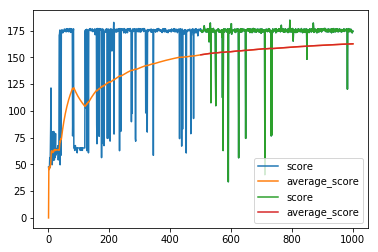

In [41]:
plt.plot(reward_results['episode'], reward_results['score'], label='score')
plt.plot(reward_results['episode'], reward_results['average_score'], label='average_score')
plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: I tried to make the quadcopter land. Specifically, I started the quadcopter from a height of 10 units above the origin and tried to make it land at the origin.

I went through a lot of iterations of reward functions, trying various step functions which rewarded the agent the closer it got and penalized it for getting too far away. Eventually, I found that a lot of other students in the forums recommended a normalized rewards function, so I settled on the hyperbolic tangent function. Unfortunately, this function gets relatively close to 1 very quickly (tanh(2) is approximately 0.96) so I had to multiply my distance by a small number to get it to a reasonable size. Lastly, I substracted this value from 1 so as to incentivize the agent to get closer to the origin instead of farther away. Thus, my rewards function ended up being:

tanh(1-0.003*distance_from_origin)

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

I used Deep Deterministic Policy Gradients (DDPG) because this task had a continuous action space, and DDPGs have been shown to have high performance on problems with continuous action spaces.

I read in the forums that the default parameters, while perhaps not perfect, were sufficient to get us to our goal, and that the reward function was where most of the room for improvement lay. Because of that, I focused on tweaking the reward function over tweaking the hyperparameters too extensively. That said, the hyperparameters I ended up with were:

**Algorithm Parameters** 
* Tau = 0.01
* Gamma = 0.99

**OU Noise Parameters:**
* Mu: 0
* Theta: 0.15
* Sigma: 0.2

**Experience Replay Parameters:**
* Experience replay batch size = 64
* Experience replay buffer size = 1,000,000

My agent uses a neural network for the actor and the critic.

For the Actor, I have an input layer, followed by three fully connected hidden layers, with 32, 64, and 32 nodes respectively, and all with reLU activation functions. Finally, I have an output layer which uses a sigmoid activation function.

For the Critic, I have two sets of tensors, one for the state pathway, and the other for the action pathway. Both have input layers, and two, fully connected hidden layers with 32 and 64 nodes respectively and reLU activation functions. Finally, the two sets of tensers are merged using Keras's Add function and the output layer generates an output using a reLU activation function.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

This task is certainly much simpler than others that could have been chosen (e.g., get the quadcopter to do a barrel roll) and though it took a long time to determine the reward function parameters, once those parameters were set, the agent was able to learn relatively quickly. Therefore, I'd say this was an easier task to learn.

I think it's tough to classify with this model. The model achieves a relatively high reward very early on (within the first 50 episodes), and certainly after that the model performs very well. But in the first 400 or so episodes, there are a lot of instances where the model reverts and performs very poorly for a few iterations before again finding a better policy. That becomes less frequent in episodes 400 through 800, and it occurs very rarely at all in the last two hundred episodes. So there's certainly a gradual learning curve in the fine tuning aspect (less consistently reverting to a worse policy) but there is a brief aha moment where the model finds a very good policy and follows it consistently for a brief period before exploring some less optimal policies.

The final performance of the agent was relatively good, in my opinion. After the agent had found a good policy it did a good job of sticking with it and consistently achieving high rewards in each episode. I graphed the rewards below and found that the average reward per episode over the last 10 episodes is appriximately 174.58.

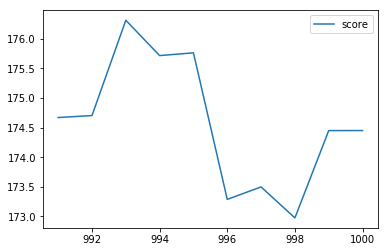

The average reward over the last 10 episodes is 174.58365002935798


In [49]:
plt.plot(reward_results['episode'][-10:], reward_results['score'][-10:], label='score')
plt.legend()
plt.show()
print('The average reward over the last 10 episodes is', np.mean(reward_results['score'][-10:]))

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

The hardest part for me was definitely determining the reward function. I would sometimes watch my model perform and watch it improve for the first 300 iterations only to fail wildly for the next 700. It confused me to no end. Eventually, I scrapped my attempts to make complex reward functions that attempted to do every little thing I wanted to do and tried to keep them simple. This ended up being a much more successful approach.

The model very quickly got to a value function that yielded a consistently high reward. At that point, I expected the model to get incrementally better over time, improving by small bits every iteration. Instead, the model sort of stayed in the 172-177 range, bouncing around every episode. I think this might be because my reward function was not geared to fine tuning the outcome once it was precise. In other words, the difference between a score of 177 and a score of 172 is pretty negligible, and without a significant difference in the reward, the model doesn't have much of a reason to fine tune its actions.